In [45]:
# section 1 load all the necessary modules and packages
import glob
import time
import geopandas as gpd
import netCDF4 as nc4
import numpy as np
import pandas as pd
import xarray as xr
from shapely.geometry import Polygon
# not neccessary for the function but for visualziation
import matplotlib.pyplot as plt
import warnings
import sys
from   easymore.easymore import easymore
import os
import cftime
import contextily as ctx
import matplotlib
font = {'family' : 'Times New Roman',
            'weight' : 'bold',
            'size'   : 40}
matplotlib.rc('font', **font)



# South Saskatchwan at Saskatoon data extraction

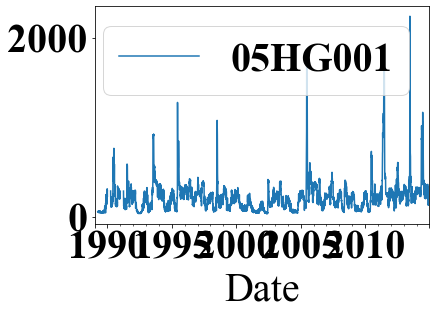

In [46]:
dataset = xr.open_dataset('/Users/shg096/Desktop/HYDAT_05.nc') # the source file creation

temp = dataset.sel(time=slice('1989-01-01', '2014-12-31'))  # slice for in time

Station_ID  = temp ['Station_ID'][:]
idx = np.where(Station_ID== '05HG001') # is the outflow of Lake Difenbaker
idx = np.array(idx)
idx = idx[0]


South_Saskatoon = temp['Flow'][idx,:]
South_Saskatoon = South_Saskatoon.to_dataframe()
South_Saskatoon = South_Saskatoon.reset_index(level=0, drop=True)
South_Saskatoon ['Date'] = South_Saskatoon.index
South_Saskatoon ['Date'] = South_Saskatoon ['Date'].astype(str)
South_Saskatoon = South_Saskatoon.reset_index(drop=True)
South_Saskatoon['Date'] =  pd.to_datetime(South_Saskatoon['Date'])
South_Saskatoon = South_Saskatoon.set_index('Date')
South_Saskatoon = South_Saskatoon.rename(columns={"Flow": "05HG001"})
South_Saskatoon = South_Saskatoon.drop(columns=['lon','lat'])

South_Saskatoon.plot()

South_Saskatoon.to_csv('../data/South_Saskatchewan_at_Saskatoon.csv')

# plt.legend(['pretty1', 'pretty2'],loc='upper left')



# Plot for the discharge at Saskatoon River


Index(['Doll', 'Doll_HYPE', 'Doll_HYPE_HANASAKI', 'no_lake', 'Observation'], dtype='object')


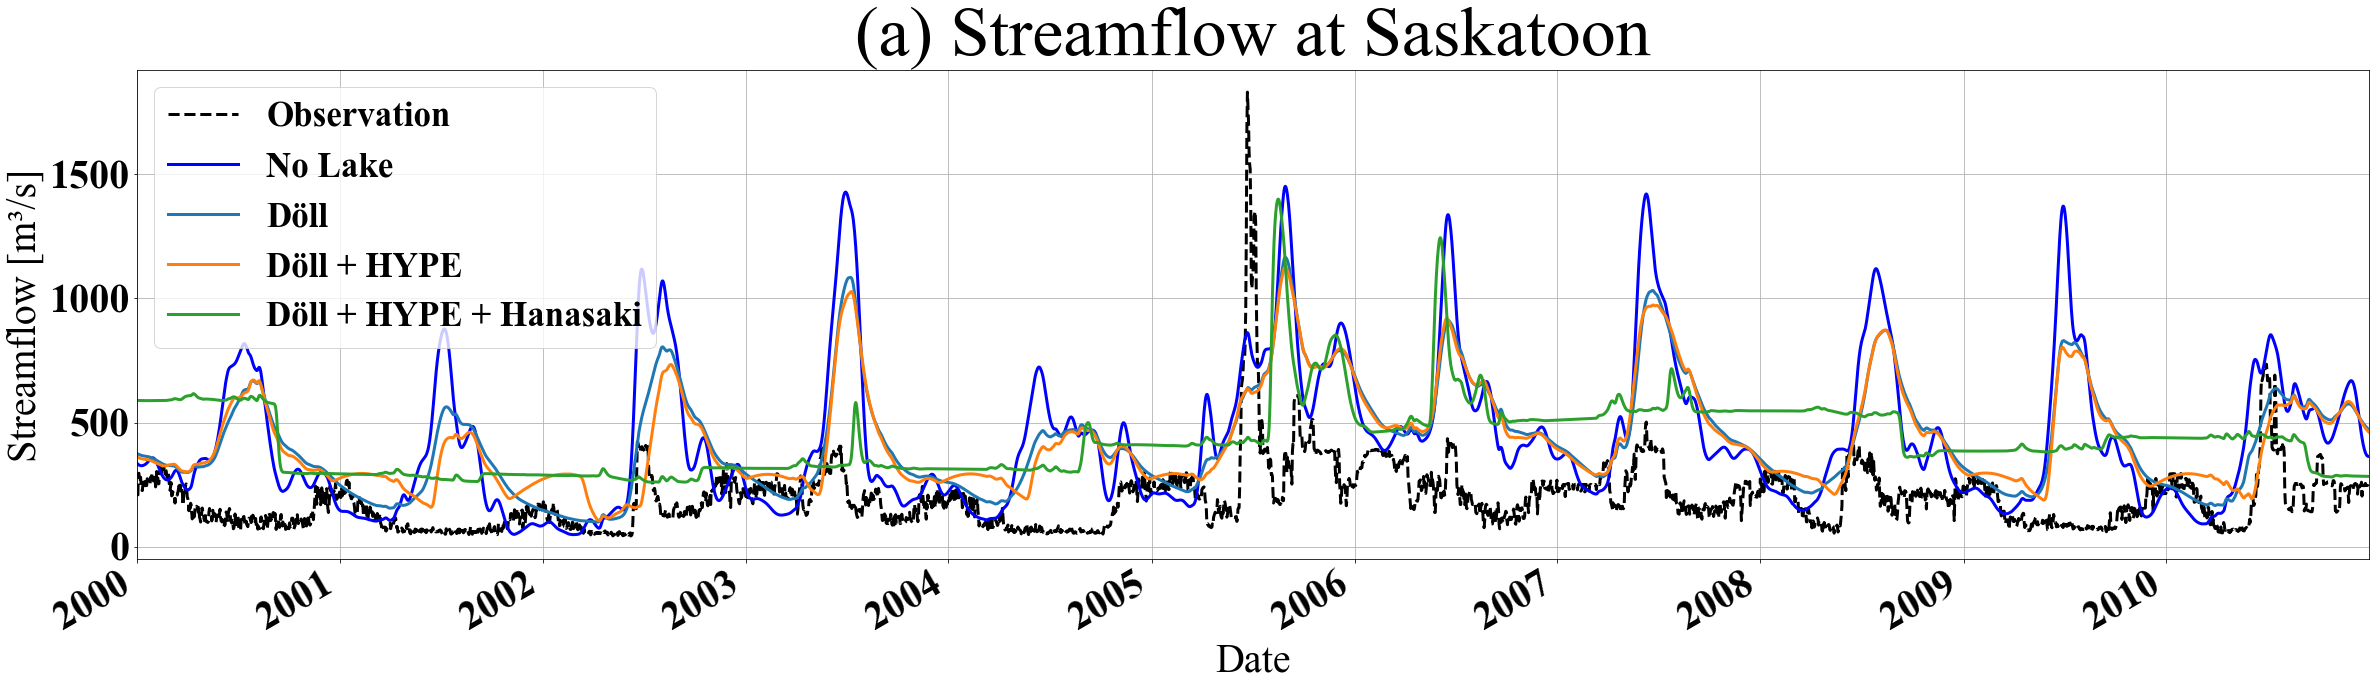

In [61]:
###
dataset = xr.open_dataset('../output/South_Sask_lake_Doll.nc') # doll

reachID = dataset['reachID'][:]
idx = np.where(reachID== 71021602) # is the outflow of Lake Difenbaker
idx = np.array(idx)
idx = idx[0]
Doll = dataset['IRFroutedRunoff'][:,idx]
Doll = Doll.to_dataframe()
Doll = Doll.reset_index(level=1, drop=True)
Doll ['Date'] = Doll.index
Doll ['Date'] = Doll ['Date'].astype(str)
Doll = Doll.reset_index(drop=True)
Doll['Date'] =  pd.to_datetime(Doll['Date'])
Doll = Doll.set_index('Date')
Doll = Doll.rename(columns={"IRFroutedRunoff": "Doll"})

# create the Difenbaker
Difenbaker = Doll.copy()



###
dataset = xr.open_dataset('../output/South_Sask_lake_Doll_HYPE.nc')

reachID = dataset['reachID'][:]
idx = np.where(reachID== 71021602) # is the outflow of Lake Difenbaker
idx = np.array(idx)
idx = idx[0]
Doll_HYPE = dataset['IRFroutedRunoff'][:,idx]
Difenbaker ['Doll_HYPE'] = np.array(Doll_HYPE)

###
dataset = xr.open_dataset('../output/South_Sask_lake_Doll_HYPE_HANASAKI.nc')

reachID = dataset['reachID'][:]
idx = np.where(reachID== 71021602) # is the outflow of Lake Difenbaker
idx = np.array(idx)
idx = idx[0]
Doll_HYPE_HANASAKI = dataset['IRFroutedRunoff'][:,idx]
Difenbaker ['Doll_HYPE_HANASAKI'] = np.array(Doll_HYPE_HANASAKI)


###
dataset = xr.open_dataset('../output/South_Sask_no_lake.nc')

reachID = dataset['reachID'][:]
idx = np.where(reachID== 71021602) # is the outflow of Lake Difenbaker
idx = np.array(idx)
idx = idx[0]
no_lake = dataset['IRFroutedRunoff'][:,idx]
Difenbaker ['no_lake'] = np.array(no_lake)


### read the model
South_Saskatoon = pd.read_csv('../data/South_Saskatchewan_at_Saskatoon.csv')
South_Saskatoon['Date'] =  pd.to_datetime(South_Saskatoon['Date'])
South_Saskatoon = South_Saskatoon.set_index('Date')
South_Saskatoon = South_Saskatoon.rename_axis(index=None)
South_Saskatoon = South_Saskatoon[(South_Saskatoon.index.month != 2) | (South_Saskatoon.index.day != 29)]
South_Saskatoon = South_Saskatoon.loc['1989-01-01':'2014-12-31']
Difenbaker ['Observation'] = np.array(South_Saskatoon['05HG001'])

##
print(Difenbaker.columns)

columns_list_order = ['Observation', 'no_lake', 'Doll', 'Doll_HYPE', 'Doll_HYPE_HANASAKI']

Difenbaker = Difenbaker[columns_list_order]


###
#plotting

Difenbaker = Difenbaker.loc['2000-01-01':'2010-12-31']

import matplotlib
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 40}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=(40,10))
Difenbaker.plot(ax = ax,
                style={'Observation': '--k', 'no_lake': 'b', 'Döll': 'r', 'Döll_HYPE': 'm', 'Döll_HYPE_HANASAKI': 'g' },
                linewidth=3.0)
plt.grid()

plt.legend(['Observation', 'No Lake', 'Döll', 'Döll + HYPE', 'Döll + HYPE + Hanasaki'],
           loc='upper left',
            fontsize = 35)

plt.xlim('2000-01-01','2010-12-31')
plt.title('(a) Streamflow at Saskatoon',fontsize = 70)
plt.ylabel('Streamflow [m³/s]')

plt.savefig('../frame/Streamflow_at_Saskatoon.png', dpi=400)
plt.savefig('../frame/Streamflow_at_Saskatoon.jpg', dpi=400)
plt.savefig('../frame/Streamflow_at_Saskatoon.jpeg', dpi=400)



# find the storage of lake Difenbaker

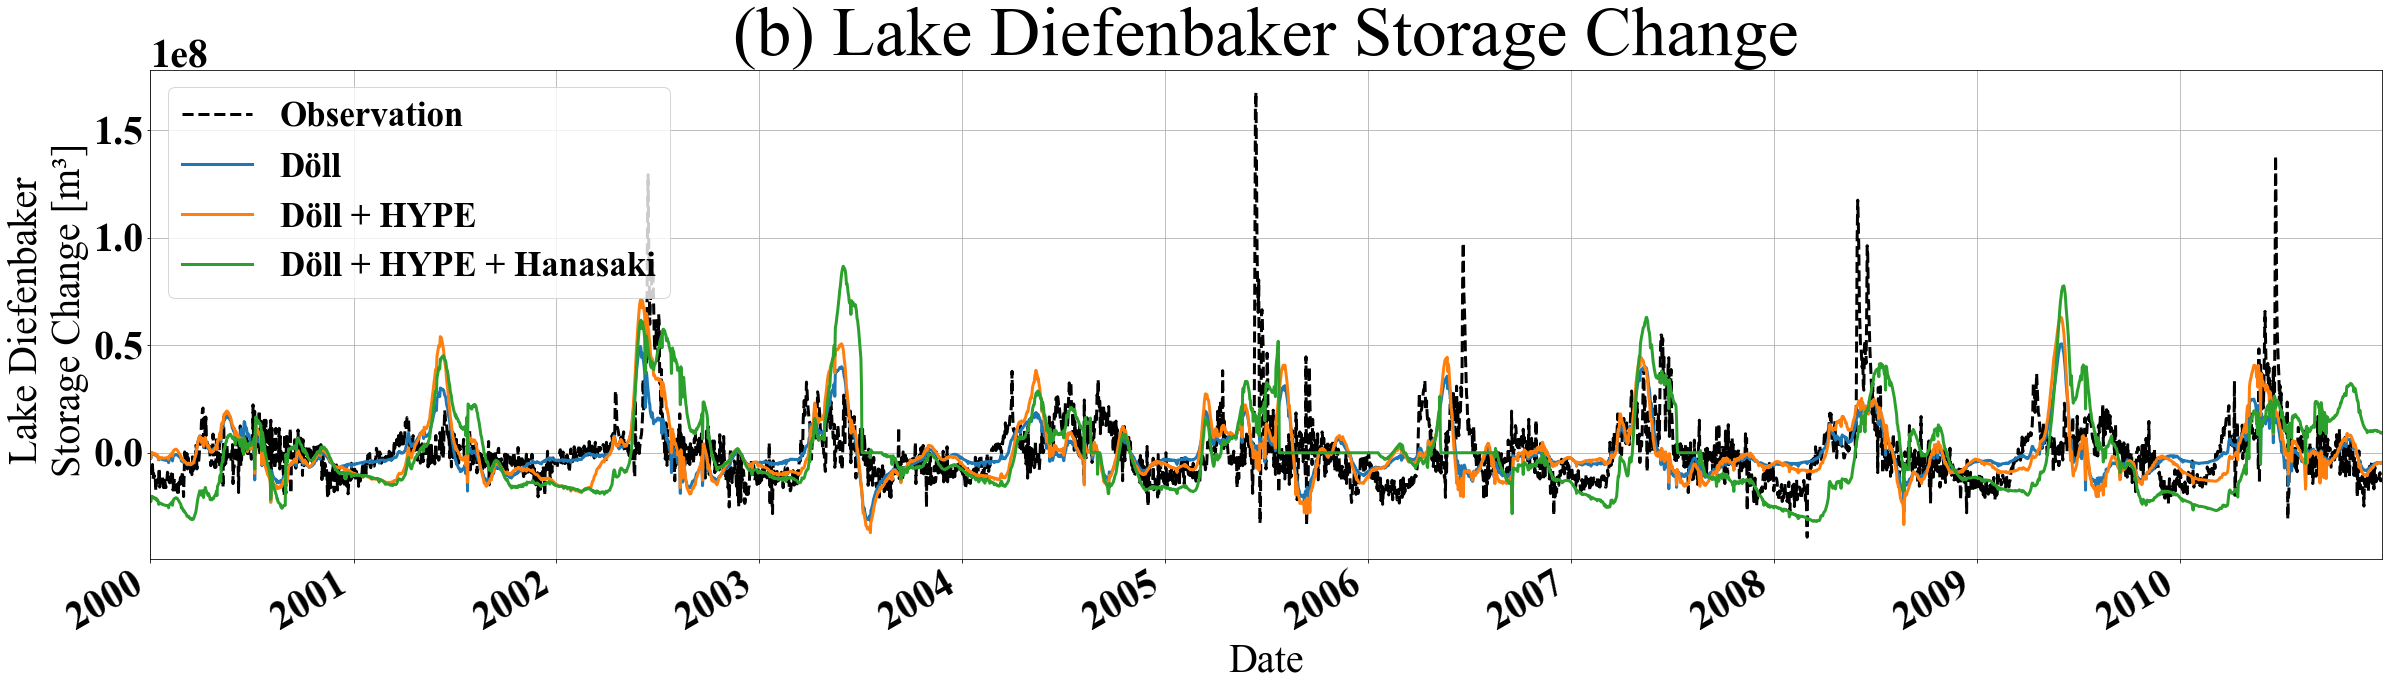

In [62]:
###
dataset = xr.open_dataset('../output/South_Sask_lake_Doll.nc')


reachID = dataset['reachID'][:]
idx = np.where(reachID== 643) # is the outflow of Lake Difenbaker
idx = np.array(idx)
idx = idx[0]
Doll = dataset['volume'][:,idx]
Doll = Doll.to_dataframe()
Doll = Doll.reset_index(level=1, drop=True)
Doll ['Date'] = Doll.index
Doll ['Date'] = Doll ['Date'].astype(str)
Doll = Doll.reset_index(drop=True)
Doll['Date'] =  pd.to_datetime(Doll['Date'])
Doll = Doll.set_index('Date')
Doll = Doll.rename(columns={"volume": "Doll"})

#
Difenbaker = Doll.copy()


###
dataset = xr.open_dataset('../output/South_Sask_lake_Doll_HYPE.nc')

reachID = dataset['reachID'][:]
idx = np.where(reachID== 643) # is the outflow of Lake Difenbaker
idx = np.array(idx)
idx = idx[0]
Doll_HYPE = dataset['volume'][:,idx]
Difenbaker ['Doll_HYPE'] = np.array(Doll_HYPE)


###
dataset = xr.open_dataset('../output/South_Sask_lake_Doll_HYPE_HANASAKI.nc')

reachID = dataset['reachID'][:]
idx = np.where(reachID== 643) # is the outflow of Lake Difenbaker
idx = np.array(idx)
idx = idx[0]
Doll_HYPE = dataset['volume'][:,idx]
Difenbaker ['Doll_HYPE_HANASAKI'] = np.array(Doll_HYPE)

###
# load the elevation storage relationship
ele_str = pd.read_csv('../data/Storage_Elevation_Diefenbaker.csv')
# load
DF = pd.read_csv('../data/level_lake_Difenbaker.csv')
DF ['storage'] =    np.interp(DF ['Value'], ele_str['Elevation(m)'], ele_str['Storage(m^3)'])
DF['Date'] =  pd.to_datetime(DF['Date'])
DF = DF.set_index('Date')
DF = DF.rename_axis(index=None)
DF = DF[(DF.index.month != 2) | (DF.index.day != 29)]

Difenbaker ['Observation'] = np.array(DF.storage)

#
list_columns = ['Observation', 'Doll', 'Doll_HYPE', 'Doll_HYPE_HANASAKI']
Difenbaker = Difenbaker[list_columns]
Difenbaker = Difenbaker.diff()

###
###
#plotting

Difenbaker = Difenbaker.loc['2000-01-01':'2010-12-31']

import matplotlib
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 40}
matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=(40,10))
Difenbaker.plot(ax = ax,
                style={'Observation': '--k', 'Döll': 'r', 'Döll_HYPE': 'm', 'Döll_HYPE_HANASAKI': 'g' },
                linewidth=3.0)
plt.grid()

plt.legend([ 'Observation', 'Döll', 'Döll + HYPE', 'Döll + HYPE + Hanasaki'],
            loc='upper left',
            fontsize = 35)

plt.xlim('2000-01-01','2010-12-31')
plt.title('(b) Lake Diefenbaker Storage Change',fontsize = 70)
plt.ylabel('Lake Diefenbaker \n Storage Change [m³]')

plt.savefig('../frame/Lake_Diefenbaker_storage.png', dpi=400)
plt.savefig('../frame/Lake_Diefenbaker_storage.jpg', dpi=400)
plt.savefig('../frame/Lake_Diefenbaker_storage.jpeg', dpi=400)



# merge the figures into one figure

In [63]:
# https://stackoverflow.com/questions/30227466/combine-several-images-horizontally-with-python
import sys
from PIL import Image

image_list = ['../frame/Streamflow_at_Saskatoon.png','../frame/Lake_Diefenbaker_storage.png']

if image_list:
    images = [Image.open(x) for x in image_list]
    widths, heights = zip(*(i.size for i in images))
    max_width = max(widths)
    total_height = sum(heights)
    new_im = Image.new('RGB', (max_width, total_height))
    y_offset = 0
    for im in images:
        new_im.paste(im, (0,y_offset))
        y_offset += im.size[1]
    new_im.save('../frame/Figure_6.png')
    new_im.save('../frame/Figure_6.jpg')
    new_im.save('../frame/Figure_6.jpeg')

